<a href="https://colab.research.google.com/github/Joshuaweg/test-winnter/blob/main/Research_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("train.csv")
print("entries: ",len(data))
data.head()

entries:  891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#preprocessing
#removing unnecessary features
reduced_data = data.drop(["PassengerId","Name","Ticket"],axis=1)
y = reduced_data["Survived"]
#create lists of categorical and Numerical features
categorical_features = ["Pclass","Sex","Embarked"]
numerical_features = ["Age","SibSp","Parch","Fare","Cabin"]

In [3]:
#look at cabin numbers and return what floor cabin number was on: MAP{A:F}-->{1:6}
#the floor is possibly more important the than the actual cabin
reduced_data["Cabin"] = reduced_data["Cabin"].str[0]
floors = {"A":1,"B":2,"C":3,"D":4,"E":5,"F":6}
reduced_data["Cabin"] = reduced_data["Cabin"].map(floors)
reduced_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,3.0,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,3.0,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [4]:
# categorical needs to transform into binary, and one-hot encodings for multiclass
import numpy as np
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(reduced_data[categorical_features])
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(categorical_features))
data_encoded = pd.concat([reduced_data[numerical_features], encoded_df], axis=1)
data_encoded.head()

,Age,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,22.0,1,0,7.2500,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,38.0,1,0,71.2833,3.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,26.0,0,0,7.9250,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,35.0,1,0,53.1000,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,35.0,0,0,8.0500,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [5]:
#seperate features from Targets
#must replace nan values with the mode for each colum
from sklearn.model_selection import train_test_split
X = data_encoded
#collect mode
X = X.fillna(0) #assertion
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, random_state=314159)
print("x_train: ",X_Train.shape)
print("y_train: ",y_Train.shape)
print("x_test: ",X_Test.shape)
print("y_test: ",y_Test.shape)
data_encoded["Survived"]=y

x_train:  (712, 14)
y_train:  (712,)
x_test:  (179, 14)
y_test:  (179,)


In [6]:
corr=data_encoded.corr()
corr.style.background_gradient(cmap='hot')

,Age,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Survived
Age,1.000000,-0.308247,-0.189119,0.096067,-0.130394,0.348941,0.006954,-0.312271,-0.093254,0.093254,0.036261,-0.022405,-0.032523,0.074120,-0.077221
SibSp,-0.308247,1.000000,0.414838,0.159651,0.046395,-0.054582,-0.055932,0.092548,0.114631,-0.114631,-0.059528,-0.026354,0.070941,-0.022508,-0.035322
Parch,-0.189119,0.414838,1.000000,0.216225,-0.025022,-0.017633,-0.000734,0.015790,0.245489,-0.245489,-0.011069,-0.081228,0.063036,-0.022467,0.081629
Fare,0.096067,0.159651,0.216225,1.000000,-0.274738,0.591711,-0.118557,-0.413333,0.182333,-0.182333,0.269335,-0.117216,-0.166603,0.045646,0.257307
Cabin,-0.130394,0.046395,-0.025022,-0.274738,1.000000,-0.566414,0.425055,0.350672,0.047634,-0.047634,-0.236640,0.100493,0.223086,-0.096126,0.065217
Pclass_1,0.348941,-0.054582,-0.017633,0.591711,-0.566414,1.000000,-0.288585,-0.626738,0.098013,-0.098013,0.296423,-0.155342,-0.170379,0.083847,0.285904
Pclass_2,0.006954,-0.055932,-0.000734,-0.118557,0.425055,-0.288585,1.000000,-0.565210,0.064746,-0.064746,-0.125416,-0.127301,0.192061,-0.024197,0.093349
Pclass_3,-0.312271,0.092548,0.015790,-0.413333,0.350672,-0.626738,-0.565210,1.000000,-0.137143,0.137143,-0.153329,0.237449,-0.009511,-0.052550,-0.322308
Sex_female,-0.093254,0.114631,0.245489,0.182333,0.047634,0.098013,0.064746,-0.137143,1.000000,-1.000000,0.082853,0.074115,-0.125722,0.064296,0.543351
Sex_male,0.093254,-0.114631,-0.245489,-0.182333,-0.047634,-0.098013,-0.064746,0.137143,-1.000000,1.000000,-0.082853,-0.074115,0.125722,-0.064296,-0.543351


LR Accuracy: 0.7821229050279329


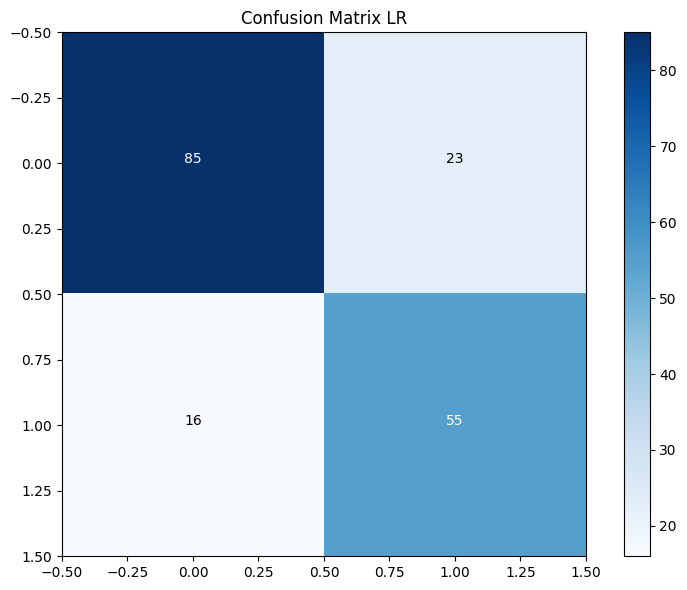

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#create confusion matrix and display in graphic with numbers
from sklearn.metrics import confusion_matrix


model = LogisticRegression(max_iter=20000)
model.fit(X_Train,y_Train)
y_pred = model.predict(X_Test)
accuracy = accuracy_score(y_Test, y_pred)
print("LR Accuracy:", accuracy)
cpo = confusion_matrix(y_Test,y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cpo, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix LR')
plt.colorbar()

# Add numbers to the plot
thresh = cpo.max() / 2
for i in range(cpo.shape[0]):
    for j in range(cpo.shape[1]):
        plt.text(j, i, format(cpo[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cpo[i, j] > thresh else "black")

plt.tight_layout()

DT Accuracy: 0.7597765363128491


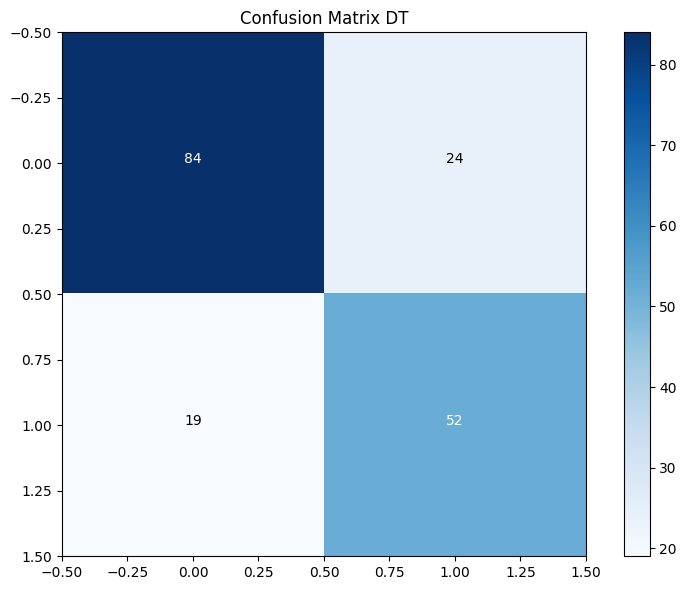

In [10]:
#decision Trees
from sklearn.tree import DecisionTreeClassifier

dc_model = DecisionTreeClassifier(random_state=314159)
dc_model.fit(X_Train, y_Train)
y_pred = dc_model.predict(X_Test)
accuracy = accuracy_score(y_Test, y_pred)
print("DT Accuracy:", accuracy)
cpo = confusion_matrix(y_Test,y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cpo, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix DT')
plt.colorbar()

# Add numbers to the plot
thresh = cpo.max() / 2
for i in range(cpo.shape[0]):
    for j in range(cpo.shape[1]):
        plt.text(j, i, format(cpo[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cpo[i, j] > thresh else "black")

plt.tight_layout()

RF Accuracy: 0.7821229050279329


'random_forest_tree.pdf'

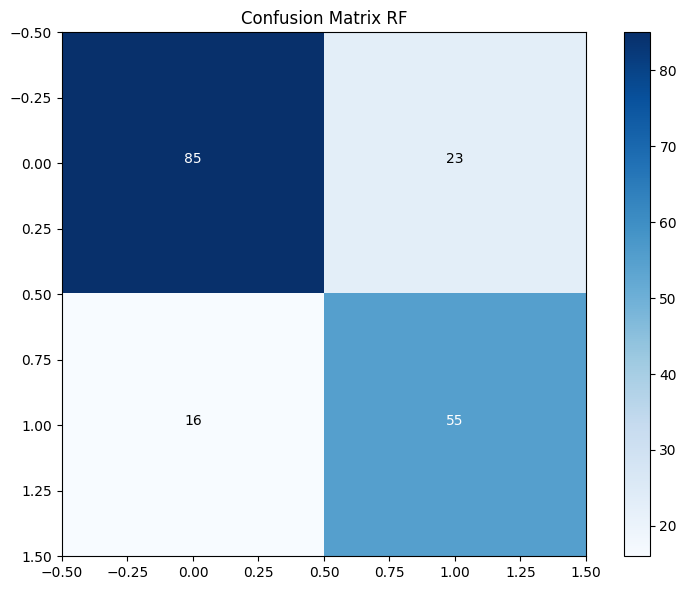

In [11]:
#lets use random forest here using entropy
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=314159,max_depth=3)
rf_model.fit(X_Train, y_Train)
y_pred = model.predict(X_Test)
accuracy = accuracy_score(y_Test, y_pred)
print("RF Accuracy:", accuracy)

cpo = confusion_matrix(y_Test,y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cpo, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix RF')
plt.colorbar()

# Add numbers to the plot
thresh = cpo.max() / 2
for i in range(cpo.shape[0]):
    for j in range(cpo.shape[1]):
        plt.text(j, i, format(cpo[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cpo[i, j] > thresh else "black")

plt.tight_layout()

#lets display the best tree
from sklearn.tree import export_graphviz
import graphviz

best_tree = rf_model.estimators_[0]
dot_data = export_graphviz(best_tree, out_file=None, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("random_forest_tree")



SVC Accuracy: 0.7821229050279329


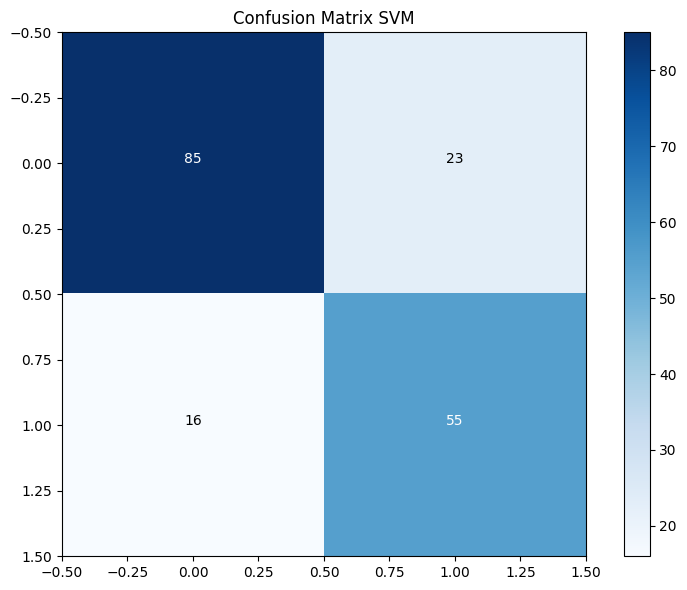

In [12]:
# lets now use support vector machines using the polynomial kernal
from sklearn.svm import SVC

svc_model = SVC(kernel='poly', degree=4,probability=True)
svc_model.fit(X_Train, y_Train)
y_pred = model.predict(X_Test)
accuracy = accuracy_score(y_Test, y_pred)
print("SVC Accuracy:", accuracy)

cpo = confusion_matrix(y_Test,y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cpo, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix SVM')
plt.colorbar()

# Add numbers to the plot
thresh = cpo.max() / 2
for i in range(cpo.shape[0]):
    for j in range(cpo.shape[1]):
        plt.text(j, i, format(cpo[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cpo[i, j] > thresh else "black")

plt.tight_layout()
# lets create a plot that shows how the line the SVM creates






MLP Accuracy: 0.770949720670391


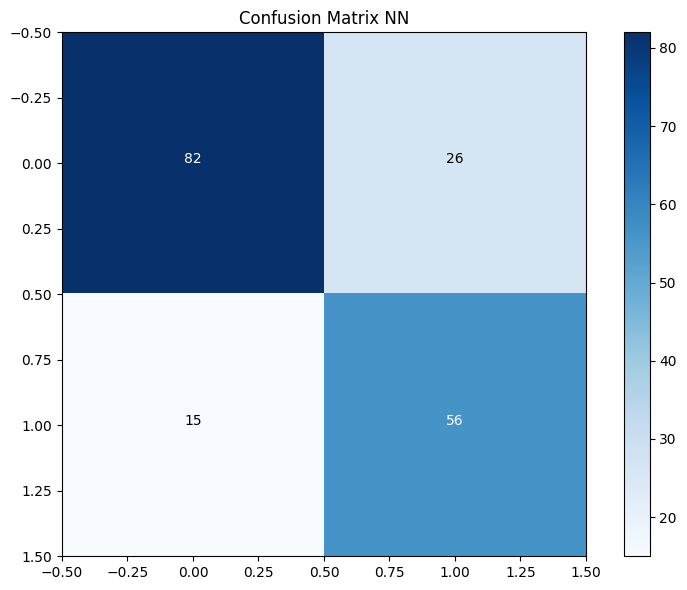

In [13]:
#MLP Classifier
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=2000)
mlp_model.fit(X_Train, y_Train)
y_pred = mlp_model.predict(X_Test)
accuracy = accuracy_score(y_Test, y_pred)
print("MLP Accuracy:", accuracy)
cpo = confusion_matrix(y_Test,y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cpo, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix NN')
plt.colorbar()

# Add numbers to the plot
thresh = cpo.max() / 2
for i in range(cpo.shape[0]):
    for j in range(cpo.shape[1]):
        plt.text(j, i, format(cpo[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cpo[i, j] > thresh else "black")

plt.tight_layout()

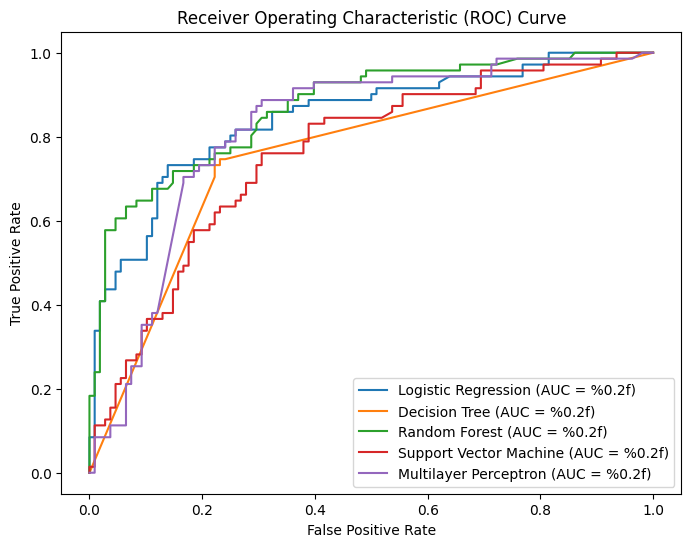

In [14]:
#generate REC curves for each classifier to compare
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
tol_max = 20

lr_plots = []
dt_plots = []
rf_plots = []
svc_plots = []
mlp_plots = []

lr_plots = roc_curve(y_Test, model.predict_proba(X_Test)[:, 1])
dt_plots = roc_curve(y_Test, dc_model.predict_proba(X_Test)[:, 1])
rf_plots = roc_curve(y_Test, rf_model.predict_proba(X_Test)[:, 1])
svc_plots = roc_curve(y_Test, svc_model.predict_proba(X_Test)[:, 1])
mlp_plots = roc_curve(y_Test, mlp_model.predict_proba(X_Test)[:, 1])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(lr_plots[0], lr_plots[1], label='Logistic Regression (AUC = %0.2f)')
plt.plot(dt_plots[0], dt_plots[1], label='Decision Tree (AUC = %0.2f)')
plt.plot(rf_plots[0], rf_plots[1], label='Random Forest (AUC = %0.2f)')
plt.plot(svc_plots[0], svc_plots[1], label='Support Vector Machine (AUC = %0.2f)')
plt.plot(mlp_plots[0], mlp_plots[1], label='Multilayer Perceptron (AUC = %0.2f)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [ ]:
# Confusion Matrix For Each classifier